# Cursland

## Ejercicio de Integrales #16

[Canal de Youtube](https://www.youtube.com/@Cursland)

[Lista de Reproducción de Integrales](https://youtube.com/playlist?list=PLa4T14UYWeoUTyjTH_gSF90i5xhKd_wGI&feature=shared)

### La función es:

<IPython.core.display.Math object>

La función en latex es: \frac{1}{x^{2} \sqrt{x^{2} + 1}}


### La integral es:

<IPython.core.display.Math object>

La integral en latex es: - \frac{\sqrt{x^{2} + 1}}{x}


### La respuesta es: INCORRECTA

<IPython.core.display.Math object>

La respuesta en latex es: - \frac{\sqrt{x^{2} + 1}}{x}


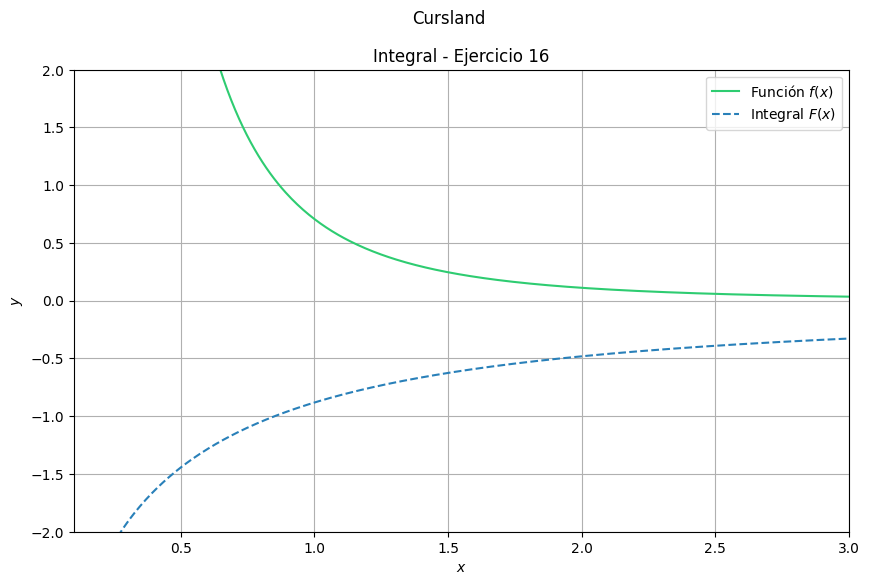

In [1]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, Math, Markdown

x = sp.symbols('x')

#
# ÁLGEBRA
#

y = 1 / (x**2 * sp.sqrt(x**2 + 1))
integral = sp.integrate(y, x)
respuesta = sp.Rational(1, 2) * sp.ln((sp.sqrt(x**2 + 1) - 1) / (sp.sqrt(x**2 + 1) + 1))

# Comprobamos si la integral propuesta es correcta
es_correcta = sp.simplify(sp.diff(respuesta, x) - y) == 0

# Mostramos la función y la integral
display(Markdown("### La función es:"))
display(Math(sp.latex(y)))
print(f"La función en latex es: {sp.latex(y)}")

display(Markdown("### La integral es:"))
display(Math(sp.latex(integral)))
print(f"La integral en latex es: {sp.latex(integral)}")

mensaje = 'CORRECTA' if es_correcta else 'INCORRECTA'
display(Markdown(f"### La respuesta es: {mensaje}"))
display(Math(r"\boxed{" + sp.latex(integral) + "}"))
print(f"La respuesta en latex es: {sp.latex(integral)}")


#
# GRÁFICA
#

def graficar(f, intervalos, grafica, etiqueta, estilo, color):
    grafica.xlabel('$x$')
    grafica.ylabel('$y$')
    grafica.grid(True)

    for intervalo in intervalos:
        inicio = intervalo[0]
        fin = intervalo[1]
        
        x_vals = np.linspace(inicio, fin, 400)
            
        y_vals = [f(x_val) for x_val in x_vals]
        
        # Si es el primero, agregamos la etiqueta
        if intervalo == intervalos[0]:
            grafica.plot(x_vals, y_vals, label=etiqueta, linestyle=estilo, color=color) 
        else:
            grafica.plot(x_vals, y_vals, linestyle=estilo, color=color)

def potencia_fraccionaria(x, n, m):
    signo = np.sign(x)
    x = abs(x)
    x = x ** (1/m)
    x = x * signo
    return x ** n

def funcion(x) -> float:
    numerador = 1
    denominador = x ** 2
    denominador *= potencia_fraccionaria(x ** 2 + 1, 1, 2)
    
    return numerador / denominador

def integral_func(x) -> float:
    numerador = 1
    denominador = potencia_fraccionaria(x ** 2 + 1, 1, 2)
    resultado = 0.5 * np.log((denominador - 1) / (denominador + 1))
    
    return resultado

plt.figure(figsize=(10, 6))
plt.title("Integral - Ejercicio 16")
plt.suptitle("Cursland")
plt.margins(0)

# Graficamos la función
graficar(funcion, [(0.1, 3)], plt, "Función $f(x)$", "solid", "#2ecc71")
graficar(integral_func, [(0.1, 3)], plt, "Integral $F(x)$", "--", "#2980b9")

# Personalización de la gráfica
plt.ylim(-2, 2)
plt.legend()

# Guardar la gráfica
plt.savefig("Ejercicio_16.svg", format='svg')
plt.savefig("Ejercicio_16.png", format='png', dpi=300)

plt.show()
